## Setup


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def josaa_scrape(year, Round):
    """
    Sample usage: df = josaa_scrape("2018", "1")
    df.info()
    """
    url = 'https://josaa.admissions.nic.in/applicant/seatmatrix/OpeningClosingRankArchieve.aspx'
    # url for 2022 is different and you have to parse that as well for 2022 data

    params = {
        "ctl00$ContentPlaceHolder1$ddlInstype": "ALL",
        "ctl00$ContentPlaceHolder1$ddlInstitute": "ALL",
        "ctl00$ContentPlaceHolder1$ddlBranch": "ALL",
        "ctl00$ContentPlaceHolder1$ddlSeatType": "OPNO",
        "ctl00$ContentPlaceHolder1$btnSubmit": "Submit"
    }

    with requests.Session() as s:
        R = s.get(url)
        data = {}
        data.update({tag['name']: tag['value'] for tag in BeautifulSoup(
            R.content, 'html.parser').select('input[name^=__]')})
        # print(data)
        data["ctl00$ContentPlaceHolder1$ddlYear"] = year
        R = s.post(url, data=data)
        # for tag in BeautifulSoup(R.content, 'html.parser').select('input[name^=__]'):
        #     print(tag['name'])
        #     print(tag['value'])
        data.update({tag['name']: tag['value'] for tag in BeautifulSoup(
            R.content, 'html.parser').select('input[name^=__]')})
        data["ctl00$ContentPlaceHolder1$ddlroundno"] = Round
        R = s.post(url, data=data)
        # for tag in BeautifulSoup(R.content, 'html.parser').select('input[name^=__]'):
        #     print(tag['name'])
        #     print(tag['value'])
        for key, value in params.items():
            data.update({tag['name']: tag['value'] for tag in BeautifulSoup(
                R.content, 'html.parser').select('input[name^=__]')})
            data[key] = value
            R = s.post(url, data=data)
        # for tag in BeautifulSoup(R.content, 'html.parser').select('input[name^=__]'):
        table = BeautifulSoup(R.text, 'html.parser').find(
            id='ctl00_ContentPlaceHolder1_GridView1')

    df = pd.read_html(table.prettify())[0]
    df.dropna(inplace=True, how="all")

    df["Year"] = year
    df["Round"] = Round

    return df


## Read Data


In [2]:
years = ['2016', '2017', '2018', '2019', '2020', '2021']
rounds = ['1', '2', '3', '4', '5', '6']

df = pd.DataFrame()
for year in years:
    for Round in rounds:
        df_temp = josaa_scrape(year, Round)
        df = df.append(df_temp)
        print('For year :',  year, ' round ', Round, ' completed')


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  5  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2016  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  5  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2017  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  5  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2018  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  5  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2019  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  5  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2020  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2021  round  1  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2021  round  2  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2021  round  3  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2021  round  4  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


For year : 2021  round  5  completed
For year : 2021  round  6  completed


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\2895273560.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


In [3]:
df


,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,NaN,3533.0,5947.0,2016,1
1,Indian Institute of Technology Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,AI,OPEN,NaN,5408.0,6561.0,2016,1
2,Indian Institute of Technology Bhubaneswar,Civil Engineering and M.Tech in Transportation...,AI,OPEN,NaN,6078.0,6579.0,2016,1
3,Indian Institute of Technology Bhubaneswar,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,NaN,1497.0,2665.0,2016,1
4,Indian Institute of Technology Bhubaneswar,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,NaN,2933.0,4241.0,2016,1
...,...,...,...,...,...,...,...,...,...
1833,"Institute of Chemical Technology, Mumbai: Indi...","Chemical Engineering (5 Years, Integrated Mast...",HS,OPEN,Gender-Neutral,53119.0,71404.0,2021,6
1834,"North-Eastern Hill University, Shillong","Biomedical Engineering (4 Years, Bachelor of T...",AI,OPEN,Gender-Neutral,54925.0,88015.0,2021,6
1835,"North-Eastern Hill University, Shillong",Electronics and Communication Engineering (4 Y...,AI,OPEN,Gender-Neutral,65959.0,75858.0,2021,6
1836,"North-Eastern Hill University, Shillong","Energy Engineering (4 Years, Bachelor of Techn...",AI,OPEN,Gender-Neutral,63807.0,85198.0,2021,6


In [9]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
url = 'src/JoSAA.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()

table = BeautifulSoup(contents, 'lxml').find('table')
df1 = pd.read_html(table.prettify())[0]
df1.dropna(inplace=True, how="all")

df1["Year"] = '2022'
df1["Round"] = '1'
df = pd.concat([df, df1], ignore_index=True, axis=0)


url = 'src/JoSAA2.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()

table = BeautifulSoup(contents, 'lxml').find('table')
df2 = pd.read_html(table.prettify())[0]
df2.dropna(inplace=True, how="all")

df2["Year"] = '2022'
df2["Round"] = '2'
df = pd.concat([df, df2], ignore_index=True, axis=0)


url = 'src/JoSAA3.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()


table = BeautifulSoup(contents, 'lxml').find('table')
df3 = pd.read_html(table.prettify())[0]
df3.dropna(inplace=True, how="all")

df3["Year"] = '2022'
df3["Round"] = '3'
df = pd.concat([df, df3], ignore_index=True, axis=0)


url = 'src/JoSAA4.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()


table = BeautifulSoup(contents, 'lxml').find('table')
df4 = pd.read_html(table.prettify())[0]
df4.dropna(inplace=True, how="all")

df4["Year"] = '2022'
df4["Round"] = '4'
df = pd.concat([df, df4], ignore_index=True, axis=0)


url = 'src/JoSAA5.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()


table = BeautifulSoup(contents, 'lxml').find('table')
df5 = pd.read_html(table.prettify())[0]
df5.dropna(inplace=True, how="all")

df5["Year"] = '2022'
df5["Round"] = '5'
df = pd.concat([df, df5], ignore_index=True, axis=0)


url = 'src/JoSAA6.mhtml'
f = open(url, 'r', encoding='utf8')
contents = f.read()
soup = BeautifulSoup(contents, 'html5lib')
f.close()


table = BeautifulSoup(contents, 'lxml').find('table')
df6 = pd.read_html(table.prettify())[0]
df6.dropna(inplace=True, how="all")

df6["Year"] = '2022'
df6["Round"] = '6'
df = pd.concat([df, df6], ignore_index=True, axis=0)


## Simple preprocessing

### For analyzing Gender Neutral, OPEN seats from 2016-2021 for IITs only.


In [4]:
# Analyzing Gender Neutral, OPEN seats from 2016-2021 for IITs only.
df_open_IIT = df.copy()
df_open_IIT['Academic Program Name'] = df_open_IIT['Academic Program Name'].apply(
    lambda x: x[:-34])

# Create a feature to indicate if IIT
df_open_IIT['IS_IIT'] = df_open_IIT['Institute'].apply(
    lambda x: True if x[:30] == 'Indian Institute of Technology' else False)

# Only keep IITs, OPEN
df_open_IIT = df_open_IIT[df_open_IIT['IS_IIT'] == True]
df_open_IIT = df_open_IIT[df_open_IIT['Seat Type'] == 'OPEN']

# Changing NaN Gender to 'Gender-Neutral'. Typically seen in 2017 as 'Female-only (including Supernumerary)' was not introduced.
df_open_IIT['Gender'] = df_open_IIT['Gender'].apply(
    lambda x: 'Gender-Neutral' if str(x) == 'nan' else x)

# Only keep 'Gender-Neutral'
df_open_IIT = df_open_IIT[df_open_IIT['Gender'] == 'Gender-Neutral']

# Find Mean Rank
df_open_IIT['Opening Rank'] = df_open_IIT['Opening Rank'].apply(
    lambda x: int(x))
df_open_IIT['Closing Rank'] = df_open_IIT['Closing Rank'].apply(
    lambda x: int(x))
df_open_IIT['Mean Rank'] = df_open_IIT['Opening Rank'] + \
    df_open_IIT['Closing Rank']
df_open_IIT['Mean Rank'] = df_open_IIT['Mean Rank'].apply(lambda x: int(x)/2)

df_open_IIT = df_open_IIT.drop(columns=['IS_IIT'])
df_open_IIT = df_open_IIT.drop(columns=['Quota'])
df_open_IIT = df_open_IIT.drop(columns=['Seat Type'])
df_open_IIT = df_open_IIT.drop(columns=['Gender'])
df_open_IIT = df_open_IIT.reset_index().drop(columns=['index'])

df_open_IIT


,Institute,Academic Program Name,Opening Rank,Closing Rank,Year,Round,Mean Rank
0,Indian Institute of Technology Bhubaneswar,Civil Engineering,3533,5947,2016,1,4740.0
1,Indian Institute of Technology Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,5408,6561,2016,1,5984.5
2,Indian Institute of Technology Bhubaneswar,Civil Engineering and M.Tech in Transportation...,6078,6579,2016,1,6328.5
3,Indian Institute of Technology Bhubaneswar,Computer Science and Engineering,1497,2665,2016,1,2081.0
4,Indian Institute of Technology Bhubaneswar,Electrical Engineering,2933,4241,2016,1,3587.0
...,...,...,...,...,...,...,...
8875,Indian Institute of Technology Jammu,Mechanical Engineering,9997,12989,2021,6,11493.0
8876,Indian Institute of Technology Dharwad,Computer Science and Engineering,3533,4718,2021,6,4125.5
8877,Indian Institute of Technology Dharwad,Electrical Engineering,5286,9463,2021,6,7374.5
8878,Indian Institute of Technology Dharwad,Engineering Physics,10431,11851,2021,6,11141.0


In [5]:
DSAI = ['Data Science and Artificial Intelligence', 'Artificial Intelligence and Data Science',
        'Data Science and Engineering', 'Artificial Intelligence', 'Statistics and Data Scie', ]
df_open_IIT_dsai = df_open_IIT.copy()
df_open_IIT_dsai['IS_DSAI'] = df_open_IIT_dsai['Academic Program Name'].apply(
    lambda x: True if x in DSAI else False)
df_open_IIT_dsai = df_open_IIT_dsai[df_open_IIT_dsai['IS_DSAI'] == True]
df_open_IIT_dsai = df_open_IIT_dsai.drop(columns=['IS_DSAI'])
df_open_IIT_dsai = df_open_IIT_dsai.sort_values(
    by=['Institute']).reset_index().drop(columns=['index'])
df_open_IIT_dsai


,Institute,Academic Program Name,Opening Rank,Closing Rank,Year,Round,Mean Rank
0,Indian Institute of Technology Bhilai,Data Science and Artificial Intelligence,5791,5974,2021,6,5882.5
1,Indian Institute of Technology Bhilai,Data Science and Artificial Intelligence,3953,5738,2020,6,4845.5
2,Indian Institute of Technology Bhilai,Data Science and Artificial Intelligence,3953,5430,2020,5,4691.5
3,Indian Institute of Technology Bhilai,Data Science and Artificial Intelligence,5350,5668,2021,2,5509.0
4,Indian Institute of Technology Bhilai,Data Science and Artificial Intelligence,5401,5791,2021,5,5596.0
...,...,...,...,...,...,...,...
73,Indian Institute of Technology Patna,Artificial Intelligence and Data Science,2994,3631,2021,2,3312.5
74,Indian Institute of Technology Patna,Artificial Intelligence and Data Science,2994,3631,2021,5,3312.5
75,Indian Institute of Technology Patna,Artificial Intelligence and Data Science,2644,3623,2021,1,3133.5
76,Indian Institute of Technology Patna,Artificial Intelligence and Data Science,2994,3631,2021,3,3312.5


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\1838045910.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd = dd[df_open_IIT.Year == Year]


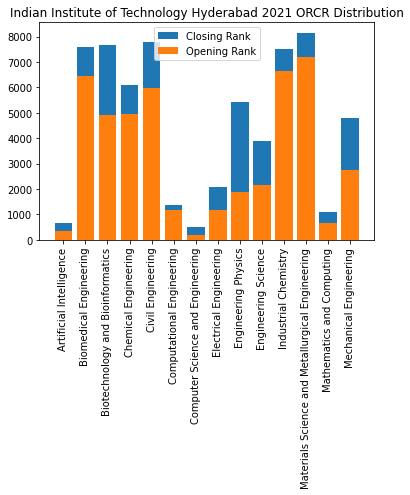

In [6]:
# Plot ORCR range for an institute
def plot_orcl(Institute, Year):
    dd = df_open_IIT[df_open_IIT.Institute == Institute]
    dd = dd[df_open_IIT.Year == Year]
    plt.bar(dd['Academic Program Name'], dd['Closing Rank'].astype(int))
    plt.bar(dd['Academic Program Name'], dd['Opening Rank'].astype(int))
    plt.xticks(rotation=90)
    plt.legend(['Closing Rank', 'Opening Rank'])
    plt.title(Institute + ' ' + Year + ' ORCR Distribution')
    plt.show()


plot_orcl('Indian Institute of Technology Hyderabad', '2021')


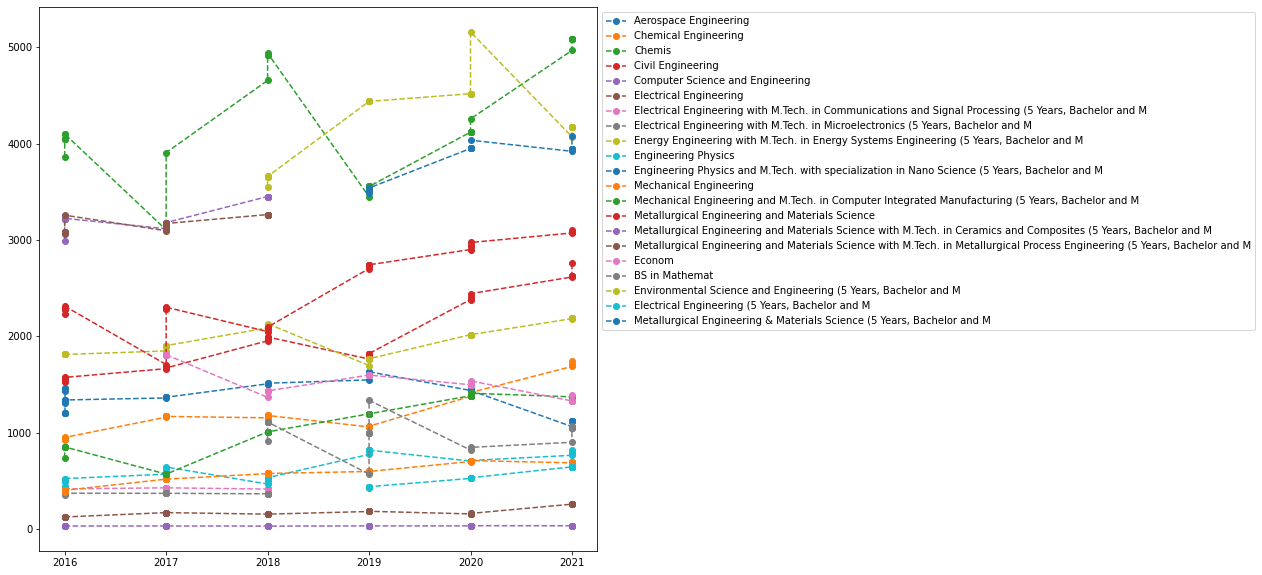

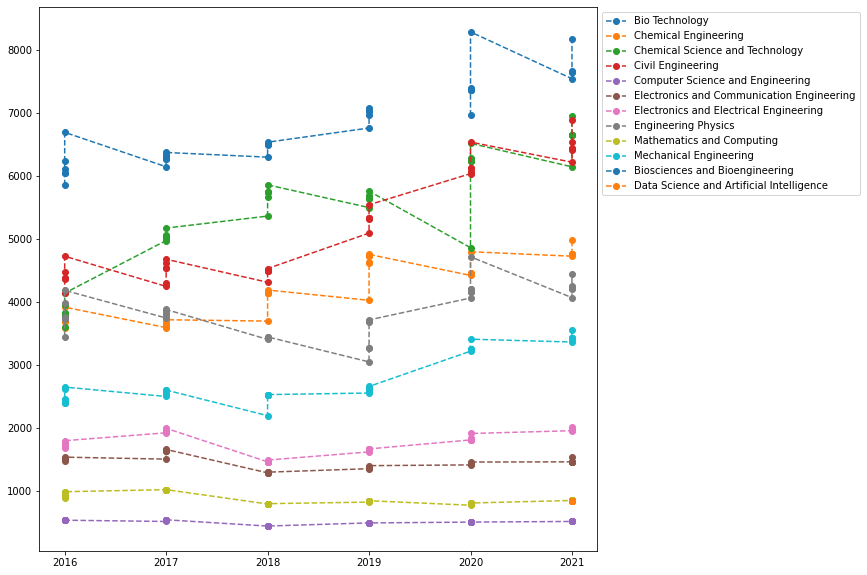

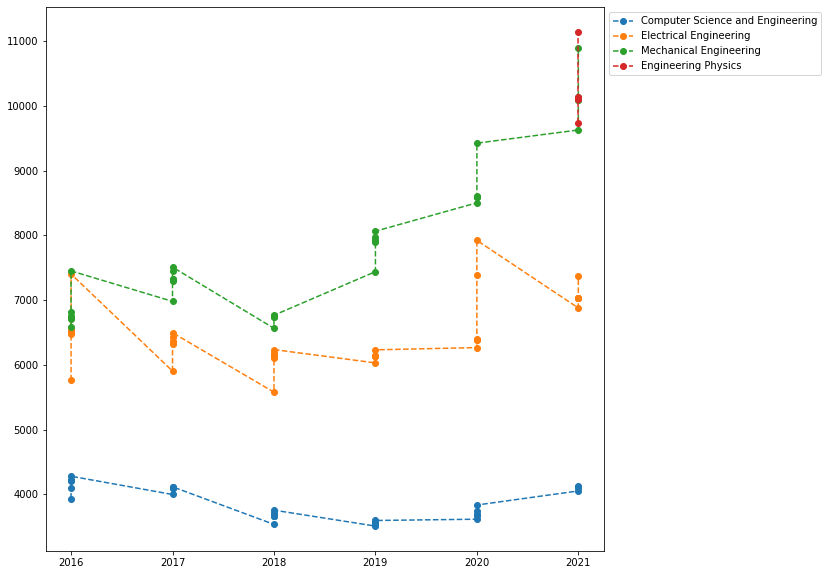

In [7]:
def institute_trend(Institute):
    dd = df_open_IIT[df_open_IIT['Institute'] == Institute]
    DPTS = dd['Academic Program Name'].unique()

    plt.rcParams['figure.figsize'] = [10, 10]
    for dpt in DPTS:
        plt.plot(dd[dd['Academic Program Name'] == dpt]['Year'],
                 dd[dd['Academic Program Name'] == dpt]['Mean Rank'], '--o')
    plt.legend(DPTS, bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()


institute_trend('Indian Institute of Technology Bombay')
institute_trend('Indian Institute of Technology Guwahati')
institute_trend('Indian Institute of Technology Dharwad')


## Analyzing first 1000 Ranks


C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\4053742489.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1000_all = df_1000_1.append(df_1000_2)


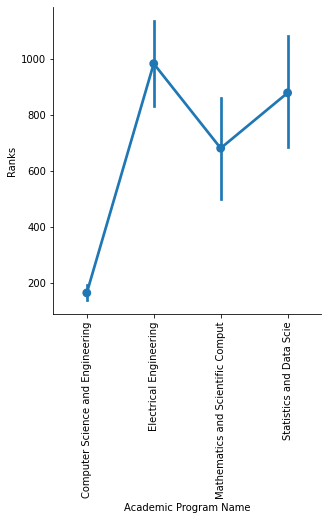

C:\Users\LAANITH\AppData\Local\Temp\ipykernel_26560\4053742489.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1000_all = df_1000_1.append(df_1000_2)


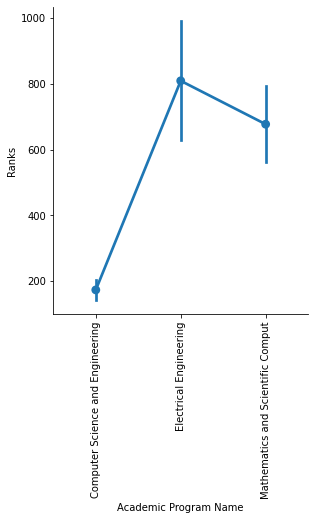

In [8]:
def plot_range(Institute, Year):
    df_1000 = df_open_IIT.copy()
    df_1000 = df_1000[df_1000['Mean Rank'] <= 1000]
    df_1000 = df_1000[df_1000['Year'] == Year]
    df_1000 = df_1000[df_1000['Institute'] == Institute]
    df_1000_1 = df_1000.copy()
    df_1000_2 = df_1000.copy()
    df_1000_1['Ranks'] = df_1000['Opening Rank']
    df_1000_2['Ranks'] = df_1000['Closing Rank']
    df_1000_all = df_1000_1.append(df_1000_2)
    sns.catplot(x="Academic Program Name", y="Ranks", kind="point",
                data=df_1000_all)
    plt.xticks(rotation=90)
    plt.show()


plot_range('Indian Institute of Technology Kanpur', '2021')
plot_range('Indian Institute of Technology Kanpur', '2020')


In [11]:
df.to_csv('totaldata.csv')
